In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [5]:
df = pd.read_csv(r'F:\Work\Materials\MLCourse\mlcourse.ai-master\data\telecom_churn.csv')

In [6]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [9]:
# 1 Признаки по одному
#1. 1. Количественные признаки

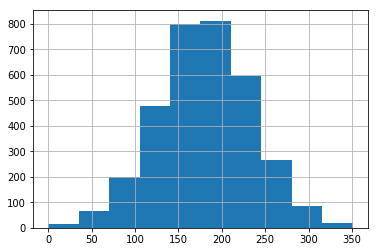

In [11]:
df['Total day minutes'].hist();

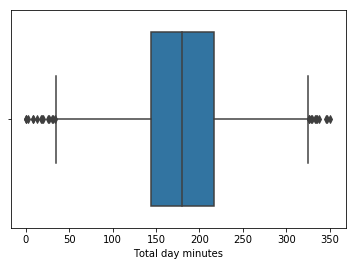

In [15]:
sns.boxplot(df['Total day minutes'])

In [16]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [17]:
# 1.2 Категориальные признаки

In [19]:
df.State.value_counts()[:5]

WV    106
MN     84
NY     83
AL     80
WI     78
Name: State, dtype: int64

In [20]:
df.Churn.value_counts()[:5]

False    2850
True      483
Name: Churn, dtype: int64

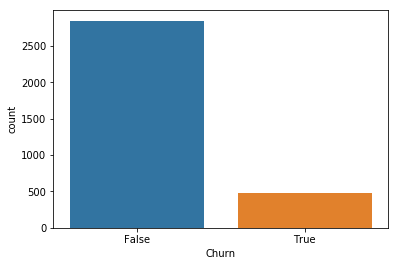

In [21]:
sns.countplot(df.Churn)

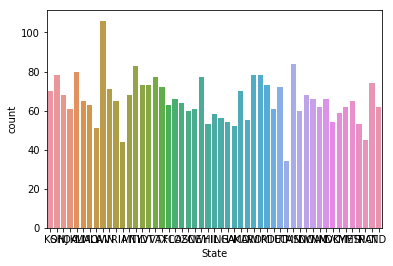

In [22]:
sns.countplot(df.State)

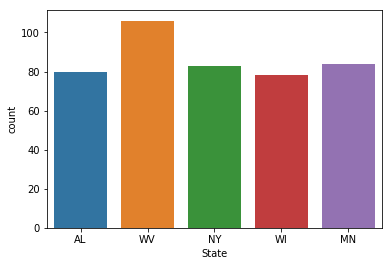

In [31]:
sns.countplot(df[df['State'].isin(df['State'].value_counts().head().index)]['State'])

In [33]:
# Взаимодействия признаков
# 2.1 Количественные с количественными

In [36]:
feat = [f for f in df.columns if 'charge' in f]
feat

['Total day charge',
 'Total eve charge',
 'Total night charge',
 'Total intl charge']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002984778B048>,
      dtype=object)

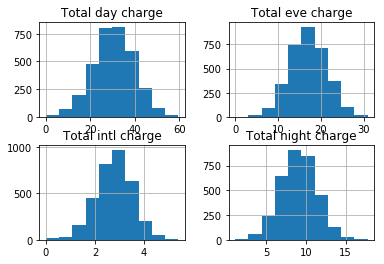

In [37]:
df[feat].hist()

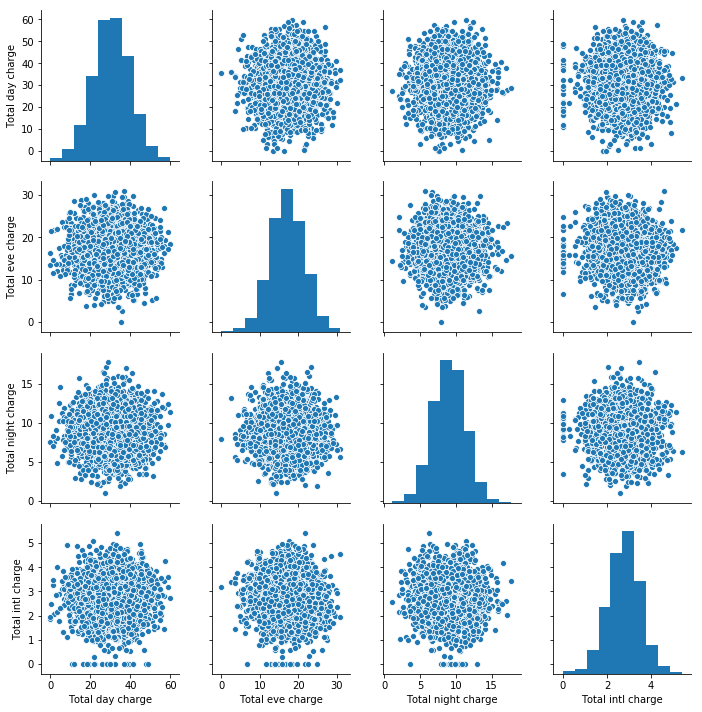

In [47]:
sns.pairplot(df[feat])

In [50]:
df.Churn.map({False : 'blue', True: 'orange'}).head()

0    blue
1    blue
2    blue
3    blue
4    blue
Name: Churn, dtype: object

In [53]:
df[~df['Churn']].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


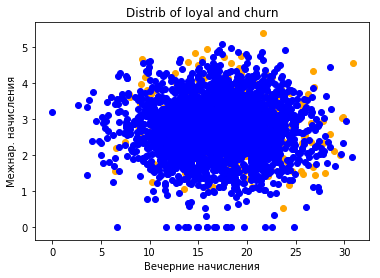

In [64]:
plt.scatter(df[df['Churn']]['Total eve charge'], df[df['Churn']]['Total intl charge'],
            color = 'orange', label = 'churn');
plt.scatter(df[~df['Churn']]['Total eve charge'], df[~df['Churn']]['Total intl charge'],
            color = 'blue', label = 'loyal');
plt.title('Distrib of loyal and churn');
plt.xlabel('Вечерние начисления');
plt.ylabel('Межнар. начисления');

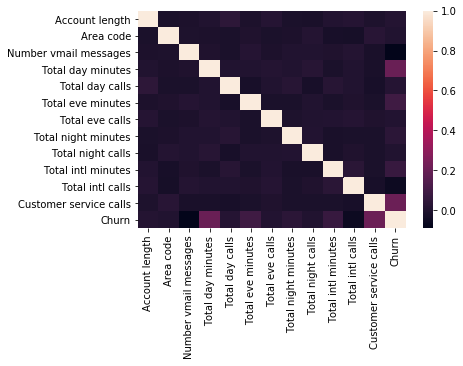

In [71]:
sns.heatmap(df.corr())

In [69]:
df.drop(feat, axis = 1, inplace = True)

In [70]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total eve minutes', 'Total eve calls',
       'Total night minutes', 'Total night calls', 'Total intl minutes',
       'Total intl calls', 'Customer service calls', 'Churn'],
      dtype='object')

In [72]:
#2.2 Взаимодействие количественного и категориального

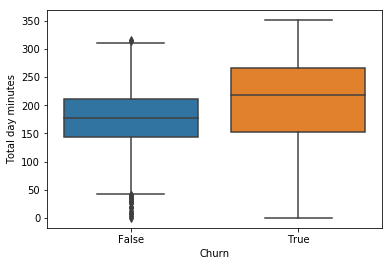

In [73]:
sns.boxplot(x='Churn',y = 'Total day minutes', data = df)

F:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


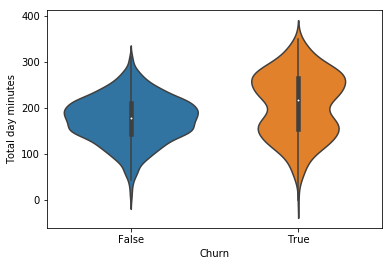

In [75]:
sns.violinplot(x='Churn',y = 'Total day minutes', data = df);

In [76]:
df.groupby('International plan')['Total day minutes'].mean()

International plan
No     178.893887
Yes    187.986997
Name: Total day minutes, dtype: float64

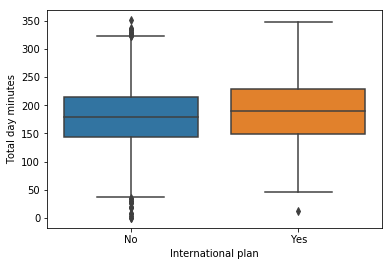

In [77]:
sns.boxplot(x='International plan',y = 'Total day minutes', data = df)

In [78]:
# 2.3 Категориальный - категориальный

In [79]:
pd.crosstab(df.Churn, df['International plan'])

International plan,No,Yes
Churn,,
False,2664,186
True,346,137


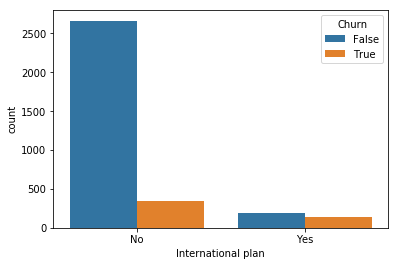

In [80]:
sns.countplot(x='International plan', hue = 'Churn', data = df)

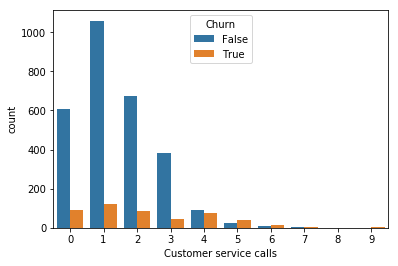

In [81]:
sns.countplot(x='Customer service calls', hue = 'Churn', data = df)

In [82]:
from sklearn.manifold import TSNE

In [84]:
tsne = TSNE(random_state=0)

In [88]:
df2 = df.drop('State',axis = 1)
df2['International plan'] = df2['International plan'].map({'Yes':1, 'No':0})
df2['Voice mail plan'] = df2['Voice mail plan'].map({'Yes':1, 'No':0})
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 15 columns):
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null int64
Voice mail plan           3333 non-null int64
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Customer service calls    3333 non-null int64
Churn                     3333 non-null bool
dtypes: bool(1), float64(4), int64(10)
memory usage: 367.9 KB


In [95]:
%%time
tsne.fit(df2)

Wall time: 43 s


TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=300,
   perplexity=30.0, random_state=0, verbose=0)

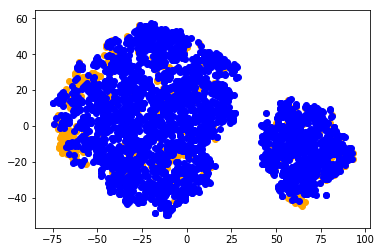

In [102]:
tsne_repr = tsne.embedding_.shape
plt.scatter(tsne.embedding_[df2['Churn'].values,0], 
            tsne.embedding_[df2['Churn'].values,1], color = 'orange')
plt.scatter(tsne.embedding_[~df2['Churn'].values,0], 
            tsne.embedding_[~df2['Churn'].values,1], color = 'blue')

In [99]:
df2['Churn'].values

array([False, False, False, ..., False, False, False])